<a href="https://colab.research.google.com/github/Laureoby/spotify_dataset/blob/main/spotify_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spotify-2023.csv')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      896 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [ ]:
#We use interpolation
data['in_shazam_charts'] = data['in_shazam_charts'].interpolate(method='linear')
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
#We fill Nan value by mode value
data['key'].mode()

0    C#
Name: key, dtype: object

In [ ]:
data['key'].fillna('C#', inplace=True)
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

#**data visualisation and user stories**

Playlist Curator User Story: As a playlist curator, I want to filter tracks based on their key, mode, and danceability, So that I can create themed playlists that cater to specific moods or activities (e.g., workout, relaxation).

In [ ]:
#Function to filter tracks
def filter_tracks(key, mode, danceability_range):
    return data[
        (data['key'] == key) &
        (data['mode'] == mode) &
        (data['danceability_%'] >= danceability_range[0]) &
        (data['danceability_%'] <= danceability_range[1])
    ]

# Example usage
filtered_tracks = filter_tracks('D', 'Minor', (80, 100))
filtered_tracks.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
714,Freaky Deaky,"Tyga, Doja Cat",2,2022,2,25,1729,0,153240879,26,...,104,D,Minor,80,24,65,2,0,9,4


User Experience Designer User Story: As a UX designer for a music streaming service, I want to analyze the speechiness, valence, and liveness of popular tracks, So that I can design better music discovery experiences tailored to user preferences in vocal content and live recording feel.

In [ ]:
# Descriptive statistics
stats = data[['speechiness_%', 'valence_%', 'liveness_%']].describe()

# Clustering similar tracks for better discovery (example with simple thresholding)
high_speechiness = data[data['speechiness_%'] > 5]  # Tracks with high vocal content
high_valence = data[data['valence_%'] > 50]          # Tracks that feel more positive
high_liveness = data[data['liveness_%'] > 10]        # Tracks with a live feel

print('STATS')
stats.head()

STATS


,speechiness_%,valence_%,liveness_%
count,953.000000,953.000000,953.000000
mean,10.131165,51.431270,18.213012
std,9.912888,23.480632,13.711223
min,2.000000,4.000000,3.000000
25%,4.000000,32.000000,10.000000


In [ ]:
print('SPEECHLESS')
high_speechiness.head()

SPEECHLESS


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9


In [ ]:
print('VALENCE')
high_valence.head()

VALENCE


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3


In [ ]:
print('LIVENESS')
high_liveness.head()

LIVENESS


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9


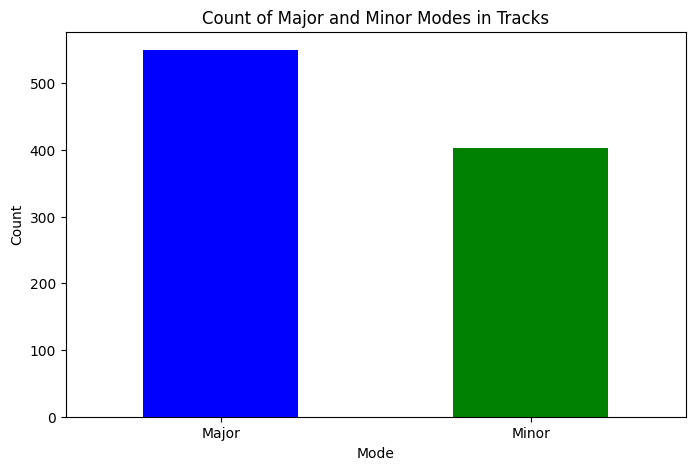

In [ ]:
# Compter les valeurs
mode_counts = data['mode'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(8, 5))
mode_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Count of Major and Minor Modes in Tracks')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotation des étiquettes des axes x
plt.show()

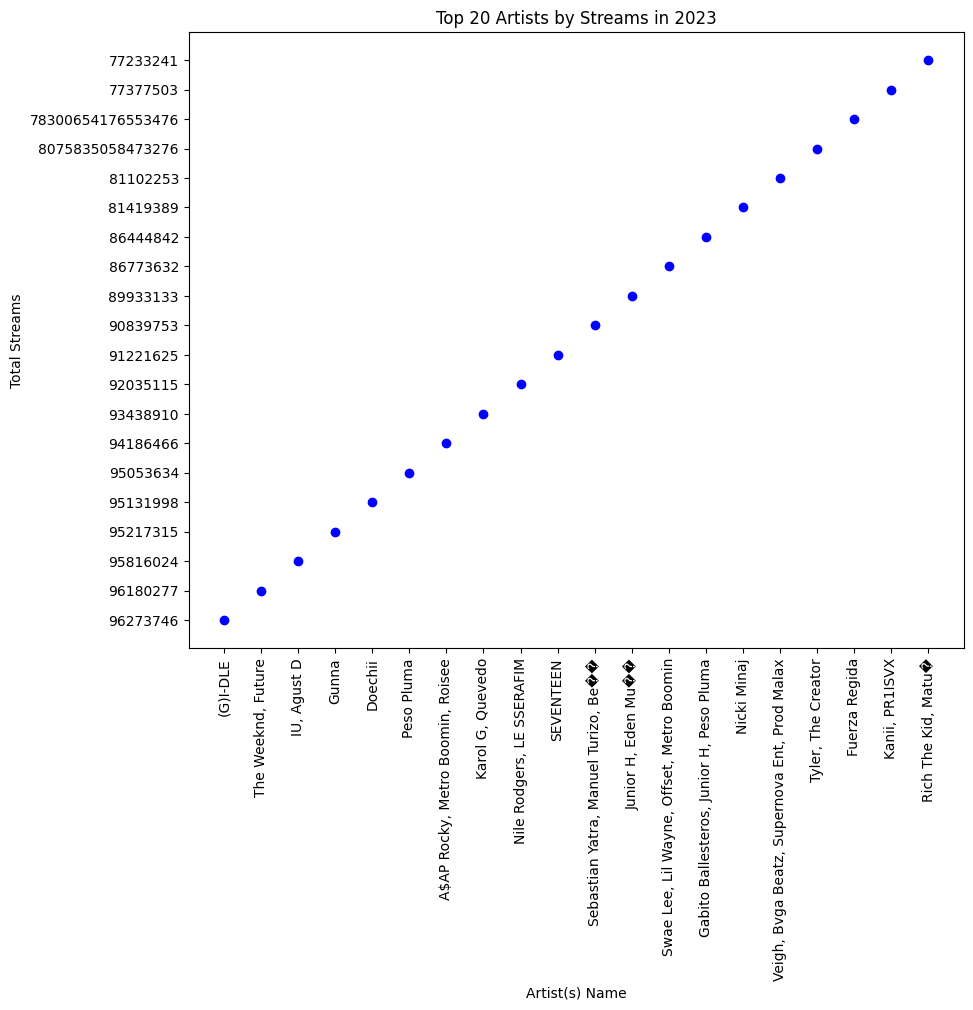

In [ ]:
# Filtrer les données pour l'année 2023
data_2023 = data[data['released_year'] == 2023]

# Aggréger les streams par artiste
artist_streams = data_2023.groupby('artist(s)_name')['streams'].sum()

# Trier et sélectionner les 20 artistes les plus streamés
top_artists = artist_streams.sort_values(ascending=False).head(20)

# Create plot pie chart
plt.figure(figsize=(10, 8))
plt.scatter(top_artists.index, top_artists.values, color='blue')
plt.title('Top 20 Artists by Streams in 2023')
plt.xlabel('Artist(s) Name')
plt.ylabel('Total Streams')
plt.xticks(rotation=90)  # Rotation des noms d'artistes pour une meilleure lisibilité
plt.show()

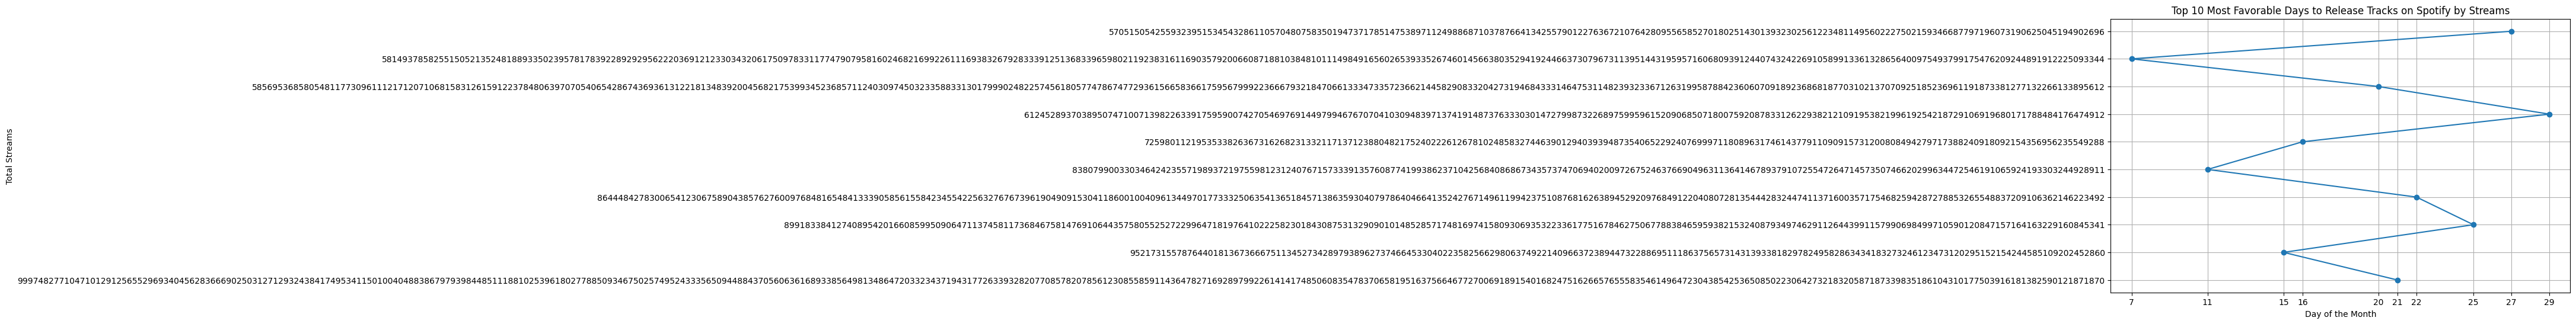

In [ ]:
# Aggregation des streams par jour de sortie
top_days = data.groupby('released_day')['streams'].sum()

# Sélection des 10 jours les plus favorables
top_days = top_days.sort_values(ascending=False).head(10)

# Création du diagramme en lignes
plt.figure(figsize=(10, 6))
plt.plot(top_days.index, top_days, marker='o')
plt.title('Top 10 Most Favorable Days to Release Tracks on Spotify by Streams')
plt.xlabel('Day of the Month')
plt.ylabel('Total Streams')
plt.grid(True)
plt.xticks(top_days.index)  # Assure que tous les jours sélectionnés sont affichés
plt.show()